In [ ]:
!pip install qiskit qiskit_aer

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}


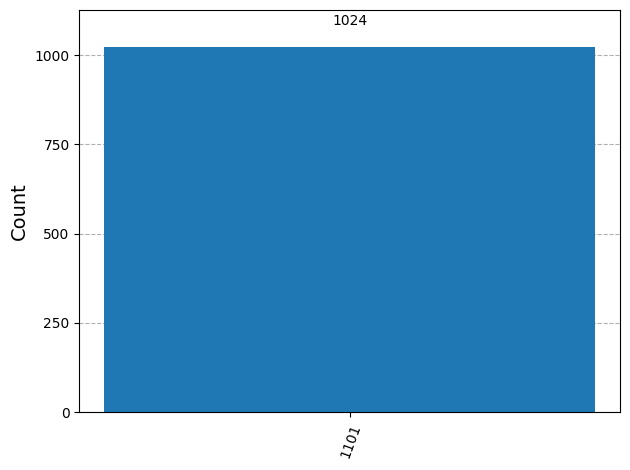

Most frequent measured bitstring (input register): 1101
✅ Successfully recovered secret string s


In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured[::-1] == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


In [3]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

Target Secret String s = 11010 (length n=5)
Target Constant b = 1

Circuit Diagram:
     ┌───┐      ░                      ░ ┌───┐┌─┐            
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├┤M├────────────
     ├───┤      ░   │                  ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├──────░───┼────■─────────────░─┤ H ├─╫─┤M├─────────
     ├───┤      ░   │    │             ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├──────░───┼────┼─────────────░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░   │    │             ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░───┼────┼────■────────░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░   │    │    │        ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░───┼────┼────┼────────░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐ ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
                                               0

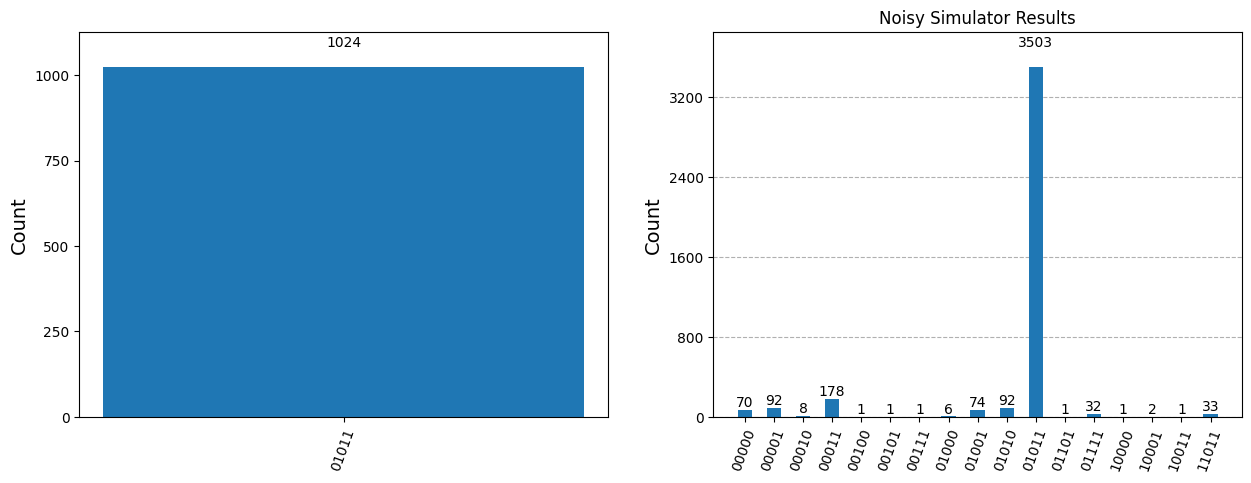

In [4]:
"""
Tasks
1. Change the secret string s and verify the measured output matches s.
2. Modify the oracle to include an additional constant bit b (i.e., implement f(x) = s·x ⊕ b) and show how b affects the ancilla only.
3. Run on a real IBM backend using qiskit_ibm_runtime and compare results with simulator.
4. Add noise via qiskit_aer.noise.NoiseModel and analyze robustness.
5. Create a notebook that explains each step with visualizations and markdown.
"""

# Now accepts a 'b' parameter (as an integer, 0 or 1)
def bv_oracle(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s · x ⊕ b."""
    # Implement s·x part
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    
    # Implement ⊕ b part
    if b == 1:
        qc.x(ancilla) # Flip the ancilla bit if b is 1

# Task 2
# Now accepts 'b' and passes it to the oracle
def bernstein_vazirani_circuit(s, b=0):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    # Prepare ancilla in state |->
    qc.x(ancilla)
    qc.h(ancilla)
    
    qc.h(inputs)
    qc.barrier()

    bv_oracle(qc, inputs, ancilla, s, b)
    qc.barrier()

    qc.h(inputs)
    qc.measure(inputs, creg)
    return qc

# Function to run the ideal simulation
def run_bv_ideal(qc, s, b, shots=1024):
    print(f"--- Running Ideal Simulation (s='{s}', b={b}) ---")
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    
    # Get the most frequent bitstring
    measured_raw = max(counts, key=counts.get)
    
    # Fix the Qiskit bit ordering
    measured_corrected = measured_raw[::-1]
    
    print(f"Measured (raw): {measured_raw} | Measured (corrected): {measured_corrected}")
    
    if measured_corrected == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s.')
    
    print("Note: The constant 'b' does not change the measured input register.")
    return counts

# Task 4
def run_bv_with_noise(qc, s, shots=4096):
    print(f"\n--- Running Noisy Simulation (s='{s}') ---")
    
    noise_model = NoiseModel()

    error_1q = depolarizing_error(0.01, 1)
    error_2q = depolarizing_error(0.05, 2)

    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
    
    print("Noise Model: Added 1% 1-qubit error and 5% 2-qubit error.")

    sim_noise = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim_noise)
    job = sim_noise.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    print('Noisy Counts:', counts)
    measured_raw = max(counts, key=counts.get)
    measured_corrected = measured_raw[::-1]
    
    print(f"Most frequent (raw): {measured_raw} | Most frequent (corrected): {measured_corrected}")
    
    if measured_corrected == s:
        print('✅ The correct string is still the most frequent.')
    else:
        print('⚠️ Noise caused the most frequent result to be incorrect.')
    return counts


if __name__ == '__main__':
    # Task 1
    s = '11010'
    
    # Task 2
    b = 1
    
    print(f"Target Secret String s = {s} (length n={len(s)})")
    print(f"Target Constant b = {b}")
    
    qc = bernstein_vazirani_circuit(s, b)
    print("\nCircuit Diagram:")
    print(qc.draw(fold=-1))
    
    # Run the ideal simulation
    ideal_counts = run_bv_ideal(qc, s, b)
    
    # Run the noisy simulation
    noisy_counts = run_bv_with_noise(qc, s)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plot_histogram(ideal_counts, ax=ax1, title="Ideal Simulator Results")
    plot_histogram(noisy_counts, ax=ax2, title="Noisy Simulator Results")
    plt.show()

Task 1: 
- The secret string s was changed to '11010'. The ideal simulation result (01011) is this secret in reverse, proving the algorithm works for any string.

Task 2: 
- A constant b=1 was added. This flips the ancilla bit (q_5) inside the oracle.
- The final measurement for s is exactly the same as it would be if b=0.
- This shows the algorithm successfully isolates s and isn't affected by the constant b.

Task 4:
- Real quantum computers are noisy, meaning operations can fail slightly.
- Ideal Plot (Left): The ideal simulator gets the correct answer (01011) 100% of the time.
- Noisy Plot (Right): We added a 1% error to single-qubit gates and a 5% error to two-qubit CNOT gates.
- While the correct answer (01011) is still the most frequent, the noise introduces other wrong answers (00001, 01001, etc).
- This is exactly what happens on real hardware. As long as the correct answer is the most probable, we can still find the secret.